In [197]:
import pandas as pd
from sklearn import datasets
import numpy as np

In [198]:
data = pd.read_csv('data/train.csv')

#data.head()

In [193]:
data.head()

data = data2

In [199]:
x = data.drop(['SalePrice'],axis=1)
y = data['SalePrice']

In [200]:
x = x.drop(['MasVnrArea'],axis=1)
x = x.drop(['GarageYrBlt'],axis=1)
x = x.drop(['LotFrontage'],axis=1)

In [163]:
len(trash)

40

In [201]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

#x.dtypes
converts = []
contador = 0
for i in x.dtypes:
    if 'object' == str(i):
        converts.append(contador)
    contador = contador + 1

converts

for i in converts:
    x.iloc[:,i] = le.fit_transform(x.iloc[:,i])


x.dtypes

x.isna().sum().sort_values()


Id               0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
                ..
Exterior1st      0
RoofMatl         0
RoofStyle        0
Foundation       0
SaleCondition    0
Length: 77, dtype: int64

In [202]:
from sklearn.model_selection import train_test_split


x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=13)


In [ ]:
data = data[data['MasVnrArea'].notna()]
data = data[data['GarageYrBlt'].notna()]
data = data[data['LotFrontage'].notna()]




In [ ]:
len(data2)

1121

In [206]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

tree = DecisionTreeRegressor(criterion='mse')    

model = RandomForestRegressor(n_estimators=200,criterion='squared_error',max_depth=15, min_samples_split= 3,min_samples_leaf=2)
#model = GradientBoostingRegressor(loss='squared_error', learning_rate= 0.1 , n_estimators = 100)

model.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=200)

In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


model = RandomForestRegressor()
param_grid = {'n_estimators':[1,10,100,200],
                'max_depth': [5,10,15],
                'min_samples_split':[2,3,5,8]}

score = scoring=['neg_mean_squared_error','r2']

grid_cv_ridge = RandomizedSearchCV(model,param_grid,scoring=score,cv=10,verbose=3,refit='neg_mean_squared_error')

grid_cv_ridge.fit(x_train,y_train)
print("R2::{}".format(grid_cv_ridge.best_score_))
print("hiperparametro melhor::{}".format(grid_cv_ridge.best_params_))

pd.DataFrame(data = grid_cv_ridge.cv_results_).head(3)

best_model = grid_cv_ridge.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END max_depth=10, min_samples_split=5, n_estimators=100; neg_mean_squared_error: (test=-746441380.449) r2: (test=0.876) total time=   0.7s
[CV 2/10] END max_depth=10, min_samples_split=5, n_estimators=100; neg_mean_squared_error: (test=-683253439.885) r2: (test=0.867) total time=   0.7s
[CV 3/10] END max_depth=10, min_samples_split=5, n_estimators=100; neg_mean_squared_error: (test=-397939202.140) r2: (test=0.914) total time=   0.7s
[CV 4/10] END max_depth=10, min_samples_split=5, n_estimators=100; neg_mean_squared_error: (test=-694253786.927) r2: (test=0.847) total time=   0.6s
[CV 5/10] END max_depth=10, min_samples_split=5, n_estimators=100; neg_mean_squared_error: (test=-1021702454.246) r2: (test=0.815) total time=   0.7s
[CV 6/10] END max_depth=10, min_samples_split=5, n_estimators=100; neg_mean_squared_error: (test=-1059484355.928) r2: (test=0.872) total time=   0.6s
[CV 7/10] END max_depth=10, min_samples_s

In [ ]:
print(best_model.get_params())
#best_model = grid_cv_ridge.best_estimator_

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
print(grid_cv_ridge.best_score_)


0.8804537987223945


In [ ]:
pd.DataFrame(data = grid_cv_ridge.cv_results_).head(3)


Feature: 0, Score: 0.00463
Feature: 1, Score: 0.00252
Feature: 2, Score: 0.00228
Feature: 3, Score: 0.01373
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00063
Feature: 6, Score: 0.00104
Feature: 7, Score: 0.00100
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00069
Feature: 10, Score: 0.00096
Feature: 11, Score: 0.00456
Feature: 12, Score: 0.00027
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00047
Feature: 15, Score: 0.00169
Feature: 16, Score: 0.51000
Feature: 17, Score: 0.00446
Feature: 18, Score: 0.01278
Feature: 19, Score: 0.00686
Feature: 20, Score: 0.00056
Feature: 21, Score: 0.00003
Feature: 22, Score: 0.00123
Feature: 23, Score: 0.00119
Feature: 24, Score: 0.00075
Feature: 25, Score: 0.00378
Feature: 26, Score: 0.00040
Feature: 27, Score: 0.00045
Feature: 28, Score: 0.01174
Feature: 29, Score: 0.00023
Feature: 30, Score: 0.00247
Feature: 31, Score: 0.00231
Feature: 32, Score: 0.03084
Feature: 33, Score: 0.00058
Feature: 34, Score: 0.00035
Feature: 35, Score: 0.00442
Fe

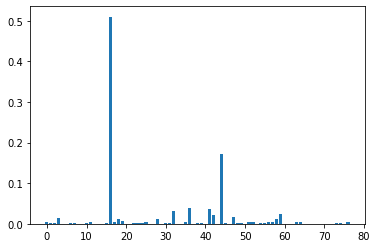

In [204]:
from matplotlib import pyplot
trash = []
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
 if v < 0.1:
    trash.append(i)
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [205]:
x = x.drop(x.columns[trash],axis = 1)

In [ ]:
model = best_model

pred = model.predict(x_test)

In [207]:
pred = model.predict(x_test)

In [208]:
from sklearn import metrics
#mse = np.mean((pred - y_test)**2)
#print(mse)
#print(model.score(x_test,y_test))

r2_score = model.score(x_test,y_test)
print("R2:{:.3f}".format(r2_score))
print("MSE:{:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test,pred))))
print("MAE:{:.3f}".format((metrics.mean_absolute_error(y_test,pred))))

R2:0.800
MSE:37021.899
MAE:19881.928


In [10]:
dataTest = pd.read_csv('data/test.csv')

dataTest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
